In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import datetime
import calendar

In [2]:
IXIC = pd.read_csv('/Users/Lee/Desktop/research-1/^IXIC-2.csv')
GSPC = pd.read_csv('/Users/Lee/Desktop/research-1/^GSPC-2.csv')

IXIC.Date = pd.to_datetime(IXIC.Date)
GSPC.Date = pd.to_datetime(GSPC.Date)

IXIC['day_of_week'] = IXIC['Date'].dt.weekday_name
GSPC['day_of_week'] = GSPC['Date'].dt.weekday_name

IXIC = IXIC.drop(['High','Low','Close','Volume'],axis=1)
GSPC = GSPC.drop(['High','Low','Close','Volume'],axis=1)

IXIC['Consecutive trading day'] = IXIC['day_of_week'].shift(1) + ' to ' + IXIC['day_of_week']
GSPC['Consecutive trading day'] = GSPC['day_of_week'].shift(1) + ' to ' + GSPC['day_of_week']

IXIC['Overnight return'] = IXIC['Open'] - IXIC['Adj Close'].shift(1)
GSPC['Overnight return'] = GSPC['Open'] - GSPC['Adj Close'].shift(1)

IXIC['Overnight % change'] = (IXIC['Overnight return']/IXIC['Adj Close'].shift(1))*100
GSPC['Overnight % change'] = (GSPC['Overnight return']/GSPC['Adj Close'].shift(1))*100

IXIC['Overnight Volatility'] = IXIC['Overnight % change'].rolling(window=20).std()
GSPC['Overnight Volatility'] = GSPC['Overnight % change'].rolling(window=20).std()

# trading_day = ['Monday to Tuesday', 'Tuesday to Wednesday', 'Wednesday to Thursday','Thursday to Friday', 'Friday to Monday']
# for day in trading_day:
#     IXIC.loc[IXIC['Consecutive trading day'] == day,'Overnight Volatility'] = IXIC.loc[IXIC['Consecutive trading day'] == day,'Overnight Volatility'].rolling(window=20).std()
    

IXIC = IXIC.dropna()
GSPC = GSPC.dropna()

In [3]:
IXIC.head()

,Date,Open,Adj Close,day_of_week,Consecutive trading day,Overnight return,Overnight % change,Overnight Volatility
20,1997-03-06,1331.459961,1315.430054,Thursday,Wednesday to Thursday,2.369995,0.178317,0.282063
21,1997-03-07,1319.739990,1311.800049,Friday,Thursday to Friday,4.309936,0.327645,0.284850
22,1997-03-10,1312.719971,1322.719971,Monday,Friday to Monday,0.919922,0.070127,0.261594
23,1997-03-11,1323.910034,1316.760010,Tuesday,Monday to Tuesday,1.190063,0.089971,0.260984
24,1997-03-12,1314.969971,1304.130005,Wednesday,Tuesday to Wednesday,-1.790039,-0.135943,0.249717


In [4]:
GSPC.head()

,Date,Open,Adj Close,day_of_week,Consecutive trading day,Overnight return,Overnight % change,Overnight Volatility
20,1997-03-06,801.989990,798.559998,Thursday,Wednesday to Thursday,0.0,0.0,0.001926
21,1997-03-07,798.559998,804.969971,Friday,Thursday to Friday,0.0,0.0,0.001926
22,1997-03-10,804.969971,813.650024,Monday,Friday to Monday,0.0,0.0,0.001926
23,1997-03-11,813.650024,811.340027,Tuesday,Monday to Tuesday,0.0,0.0,0.001926
24,1997-03-12,811.340027,804.260010,Wednesday,Tuesday to Wednesday,0.0,0.0,0.001926


### Data used: 3/6/1997 - 10/25/2017

### Volatility calculated as standard deviation (of last 20 days' return change) of % change in return

In [5]:
def summary(df,target):
    # Histogram of overnight return/volatility of consecutive trading days
    fig, ax = plt.subplots(figsize=(20,20),nrows=3,ncols=2,sharex=True, sharey=True)
#     axes = plt.gca()
#     axes.set_ylim(y_lim)
#     axes.set_xlim(x_lim)
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target],
                 kde=False, ax=ax[0][0]).set_title('Mon-Tue {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target],
                 kde=False, ax=ax[0][1]).set_title('Tue-Wed {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target],
                 kde=False, ax=ax[1][0]).set_title('Wed-Thurs {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target],
                 kde=False, ax=ax[1][1]).set_title('Thurs-Fri {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target],
                 kde=False, ax=ax[2][0]).set_title('Fri-Mon {} histogram'.format(target))

    # Stats of Consecutive Trading Days Overnight Returns/Volatility 
    means=[df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target].mean()]

    stds=[df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target].std()]
    
    overnight_summary = pd.DataFrame([means,stds])
    overnight_summary = overnight_summary.transpose()
    overnight_summary.columns = ['Mean of {}'.format(target), 'Standard Deviation of {}'.format(target)]
    overnight_summary.index = ['Monday to Tuesday', 'Tuesday to Wednesday', 'Wednesday to Thursday',
                                     'Thursday to Friday', 'Friday to Monday']
    return overnight_summary

### Overnight Return Histogram & Table:

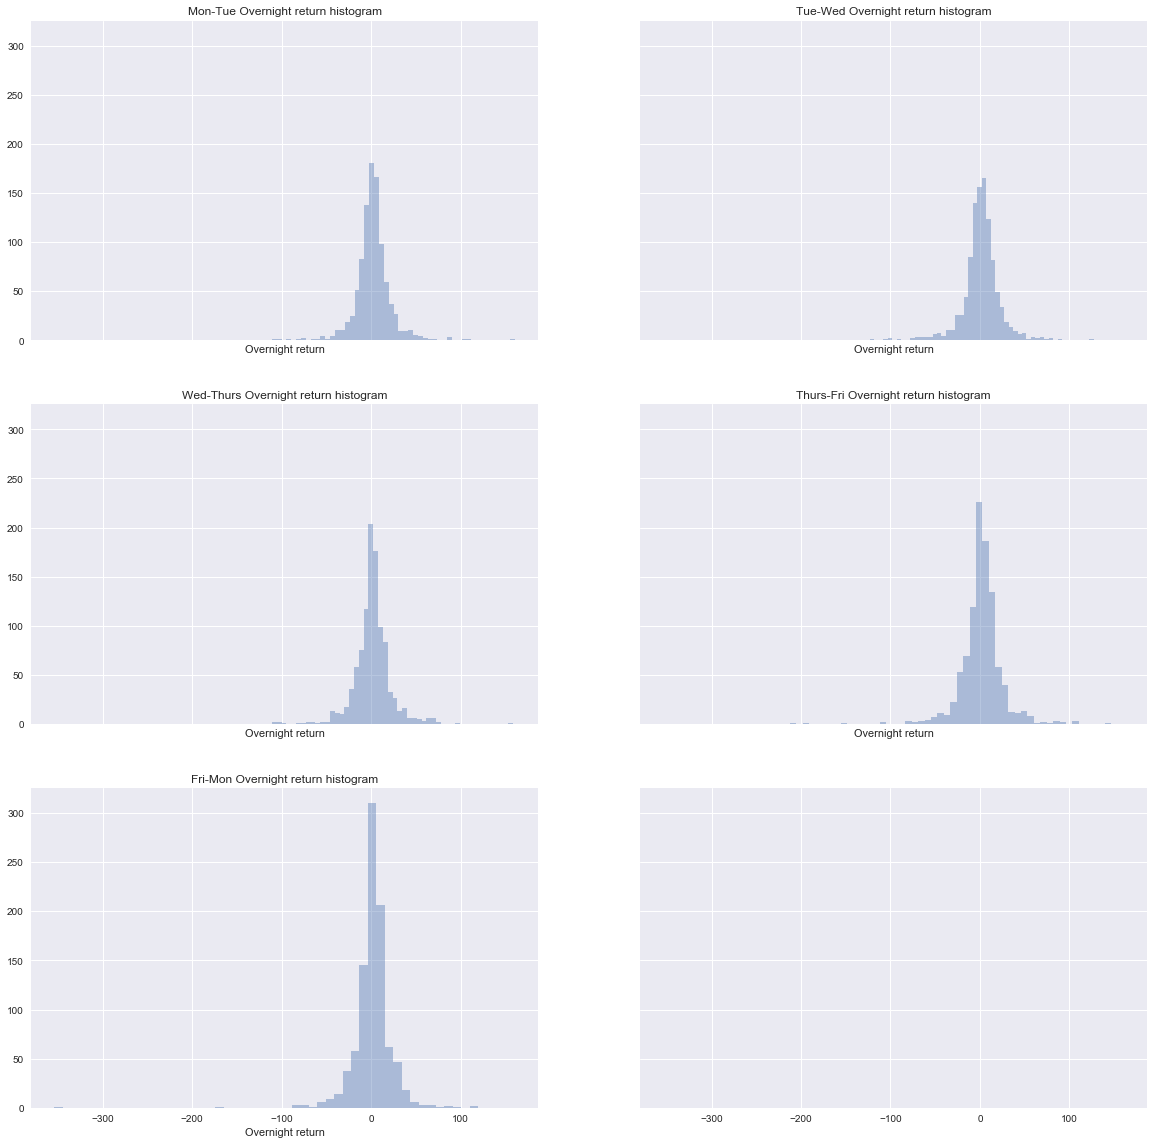

In [6]:
return_summary_IXIC = summary(IXIC,'Overnight return')

In [7]:
return_summary_IXIC

,Mean of Overnight return,Standard Deviation of Overnight return
Monday to Tuesday,1.987280,19.805357
Tuesday to Wednesday,1.306030,20.624161
Wednesday to Thursday,1.454060,21.186513
Thursday to Friday,1.644581,24.341851
Friday to Monday,1.566485,23.488366


** From the table, the overnight return for IXIC is highest from Monday to Tuesday (1.987) and lowest for Tuesday to Wednesday (1.306). ** 

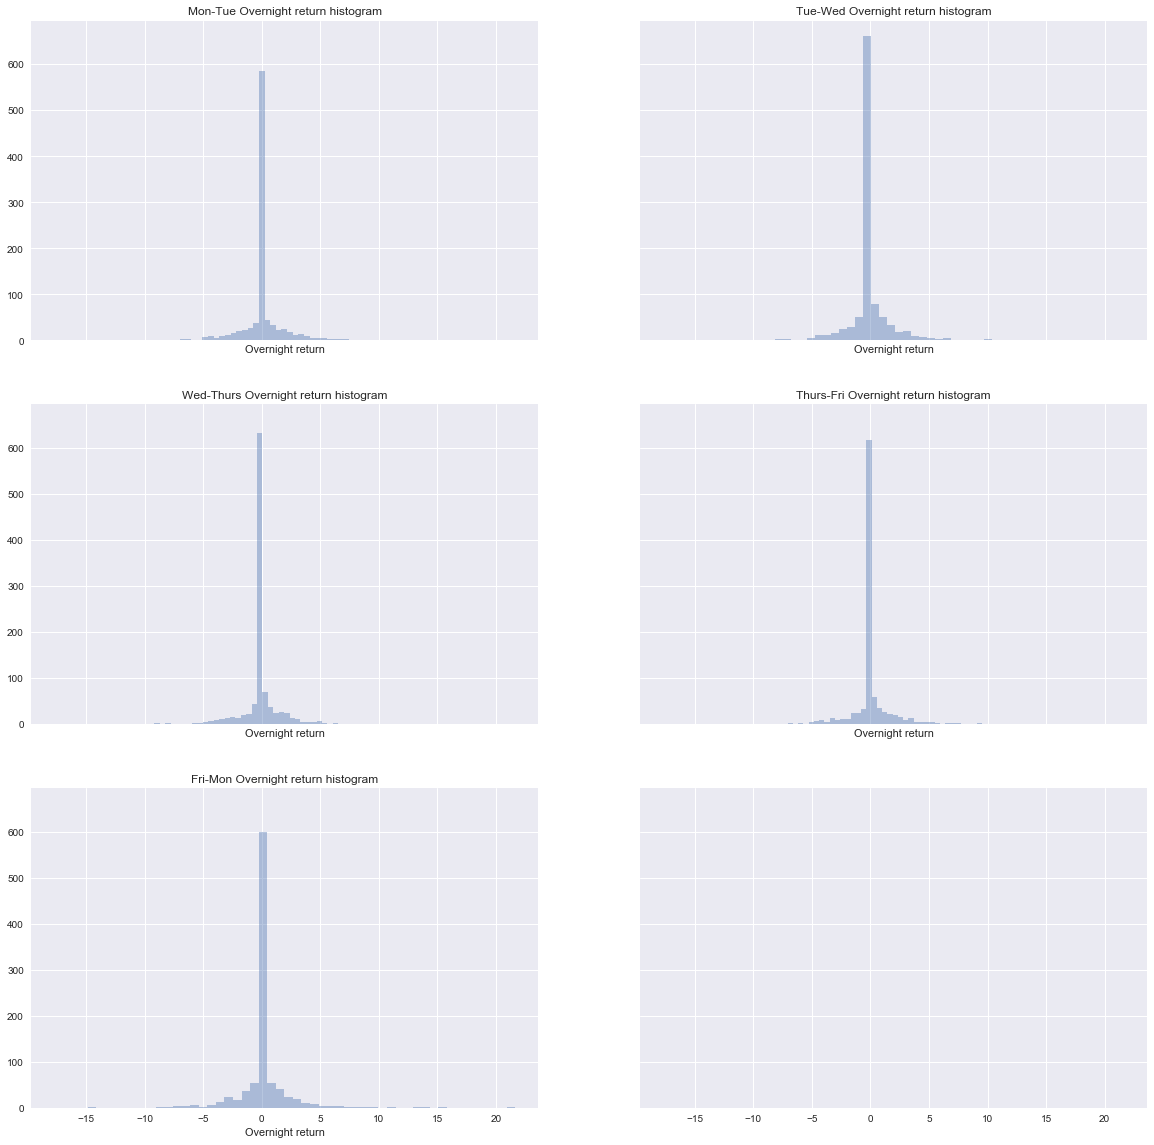

In [8]:
return_summary_GSPC = summary(GSPC,'Overnight return')

In [9]:
return_summary_GSPC

,Mean of Overnight return,Standard Deviation of Overnight return
Monday to Tuesday,0.037480,1.792923
Tuesday to Wednesday,0.022944,1.838000
Wednesday to Thursday,-0.060417,1.678493
Thursday to Friday,0.062152,1.839227
Friday to Monday,0.131214,2.145753


** From the table, the overnight return for GSPC is highest from Friday to Monday (0.131), lowest from Wednesday to Thursday (-0.06). ** 

### Overnight Volatility Histogram and Table:

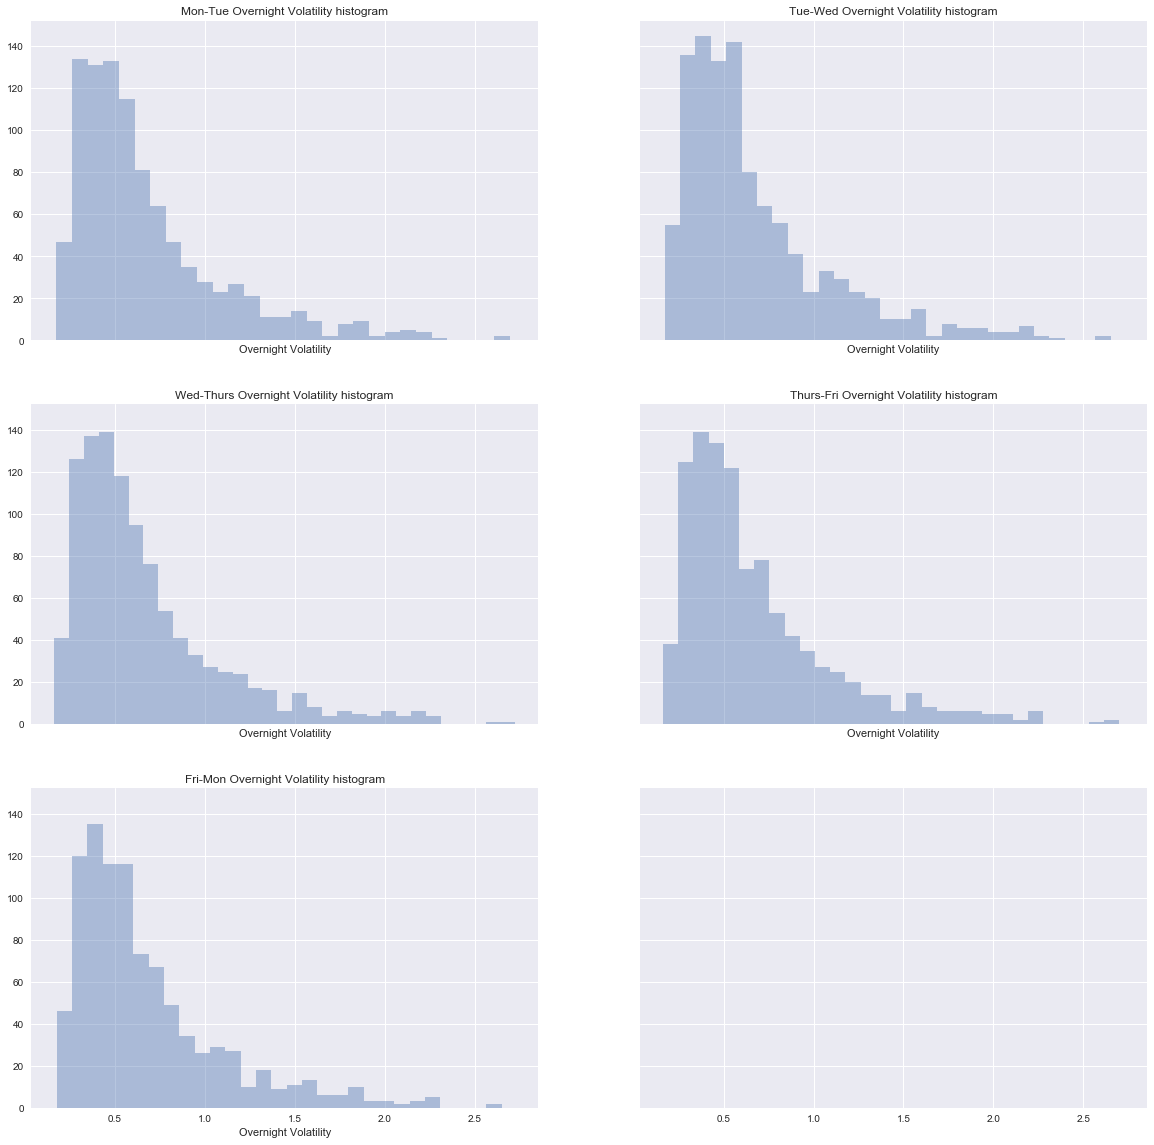

In [10]:
vol_summary_IXIC = summary(IXIC,'Overnight Volatility')

In [11]:
vol_summary_IXIC 

,Mean of Overnight Volatility,Standard Deviation of Overnight Volatility
Monday to Tuesday,0.674954,0.412299
Tuesday to Wednesday,0.675491,0.416101
Wednesday to Thursday,0.670420,0.416762
Thursday to Friday,0.675582,0.417148
Friday to Monday,0.678804,0.414422


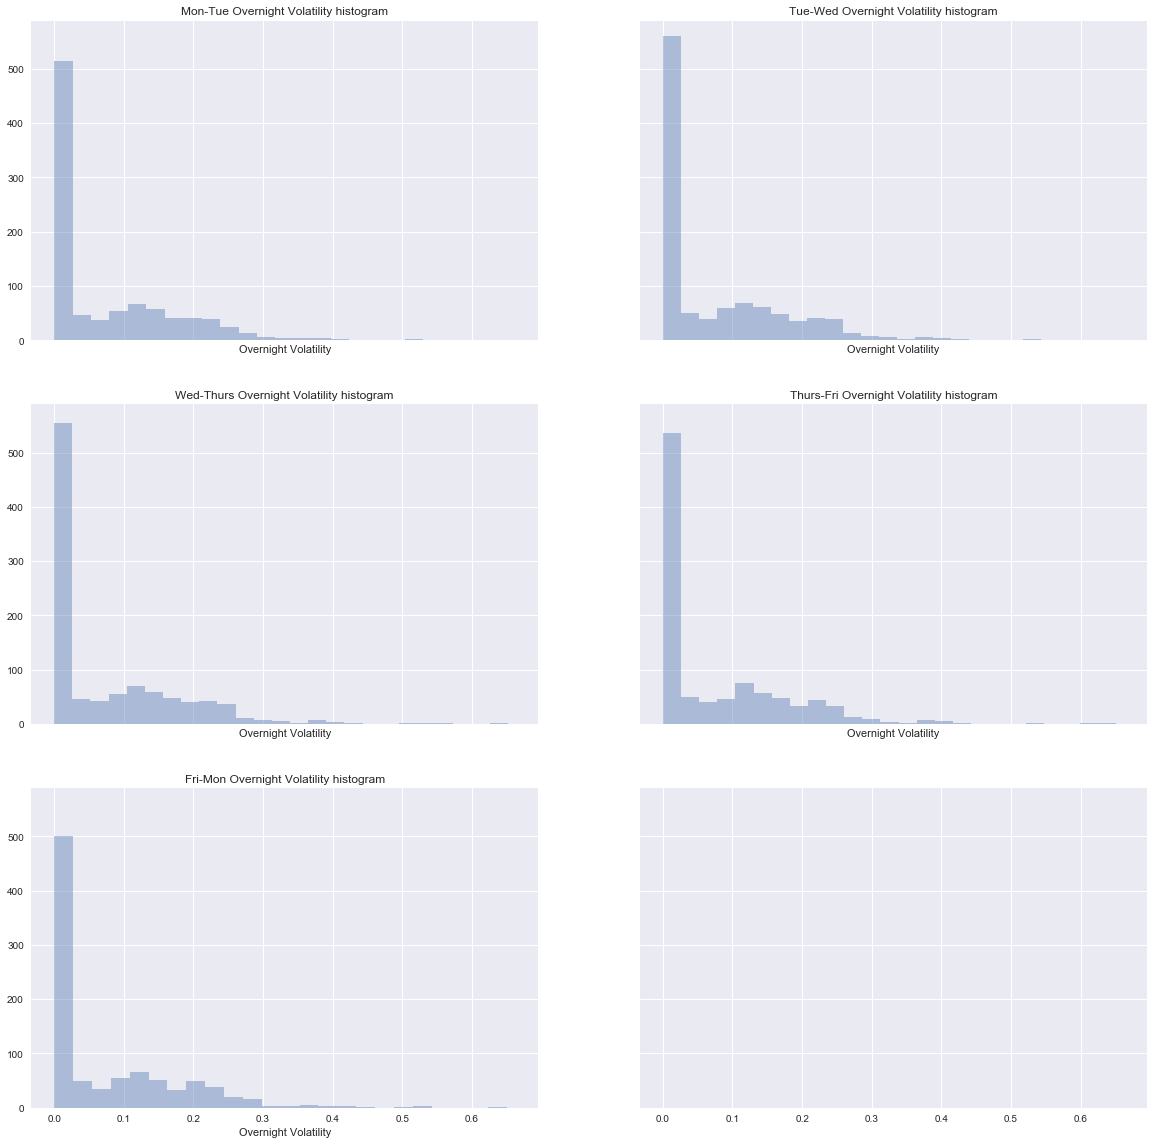

In [12]:
vol_summary_GSPC = summary(GSPC,'Overnight Volatility')

In [13]:
vol_summary_GSPC

,Mean of Overnight Volatility,Standard Deviation of Overnight Volatility
Monday to Tuesday,0.076037,0.100284
Tuesday to Wednesday,0.075930,0.100138
Wednesday to Thursday,0.075331,0.099510
Thursday to Friday,0.075320,0.099489
Friday to Monday,0.076917,0.101894
